In [1]:
# importar bibliotecas
from google.cloud import bigquery
from google.oauth2 import service_account
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [2]:
# Realizar conexão com o GCP
credentials = service_account.Credentials.from_service_account_file("../keys/ml-na-saude-ed1fc3c1a83e.json")
client = bigquery.Client(credentials=credentials, project=credentials.project_id)

In [3]:
consulta_sql = """
 select
  y.ano_obito,
  y.quadrimestre_obto,
  y.dt_obito,
  m.nm_regiao,
  m.sl_uf,
  m.nm_municipio,
  p.populacao,
  y.yll
 from `ml-na-saude.yll_por_obito.yll` y
 join `ml-na-saude.yll_por_obito.populacao` p on y.cd_mun_res = p.cd_municipio and y.ano_obito = p.ano
 join `ml-na-saude.yll_por_obito.municipio` m on p.cd_municipio = m.cd_municipio
 where p.porte = 'Médio Porte'
"""

In [4]:
warnings.simplefilter("ignore")
df = client.query(consulta_sql).to_dataframe()

In [5]:
df.head()

,ano_obito,quadrimestre_obto,dt_obito,nm_regiao,sl_uf,nm_municipio,populacao,yll
0,2010,2,2010-07-08,Norte,AC,Cruzeiro do Sul,78444,82.58
1,2010,2,2010-05-29,Nordeste,AL,Rio Largo,68512,77.58
2,2010,3,2010-12-16,Nordeste,AL,São Miguel dos Campos,54591,89.07
3,2010,2,2010-06-04,Norte,AM,Coari,75909,67.62
4,2010,2,2010-08-31,Norte,AM,Manacapuru,85144,89.55


In [34]:
df_tratado = df

In [35]:
def taxa_yll (row):
    return row['yll']*1000/row['populacao']

In [36]:
df_tratado['taxa_yll'] = df_tratado.apply(taxa_yll, axis =1)

In [37]:
df_tratado.head()

,ano_obito,quadrimestre_obto,dt_obito,nm_regiao,sl_uf,nm_municipio,populacao,yll,taxa_yll
0,2010,2,2010-07-08,Norte,AC,Cruzeiro do Sul,78444,82.58,1.052726
1,2010,2,2010-05-29,Nordeste,AL,Rio Largo,68512,77.58,1.132356
2,2010,3,2010-12-16,Nordeste,AL,São Miguel dos Campos,54591,89.07,1.631588
3,2010,2,2010-06-04,Norte,AM,Coari,75909,67.62,0.890803
4,2010,2,2010-08-31,Norte,AM,Manacapuru,85144,89.55,1.051748


In [38]:
time_series = df_tratado[['dt_obito', 'taxa_yll']]

In [39]:
time_series['dt_obito'] = pd.to_datetime(time_series['dt_obito'])

In [40]:
time_series.head()

,dt_obito,taxa_yll
0,2010-07-08,1.052726
1,2010-05-29,1.132356
2,2010-12-16,1.631588
3,2010-06-04,0.890803
4,2010-08-31,1.051748


In [41]:
time_series = time_series.set_index('dt_obito').resample('Q').mean()

In [42]:
time_series

,taxa_yll
dt_obito,
2010-03-31,0.320613
2010-06-30,0.319197
2010-09-30,0.313581
2010-12-31,0.312251
2011-03-31,0.308110
2011-06-30,0.307922
2011-09-30,0.299429
2011-12-31,0.309609
2012-03-31,0.303278


In [77]:
time_series.describe()

,taxa_yll
count,120.000000
mean,0.297122
std,0.010536
min,0.272881
25%,0.289496
50%,0.295976
75%,0.302910
max,0.325711


Text(0.5, 1.0, 'Taxa do YLL')

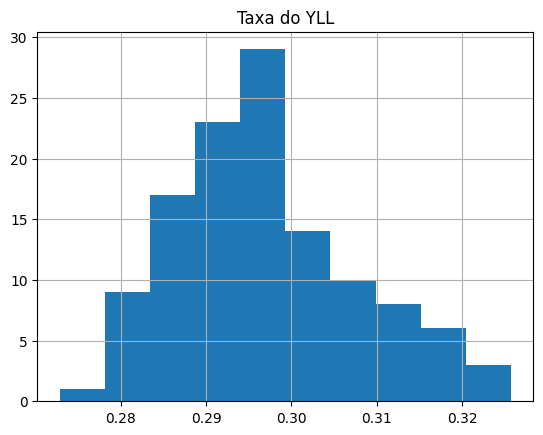

In [78]:
time_series.hist()
plt.title('Taxa do YLL')

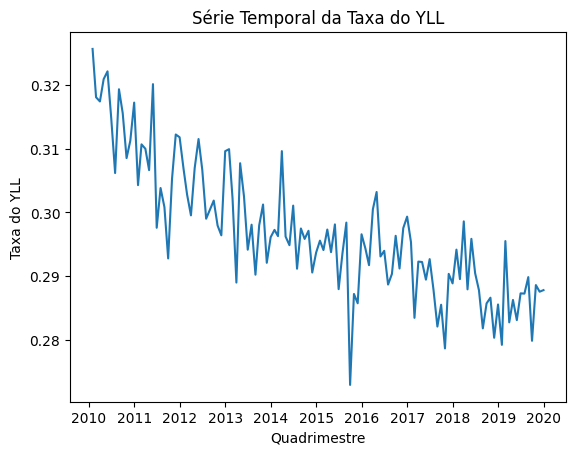

In [79]:
plt.plot(time_series)
plt.title('Série Temporal da Taxa do YLL')
plt.xlabel('Quadrimestre')
plt.ylabel('Taxa do YLL')
plt.show()

In [80]:
# # Configura o eixo x como quadrimestre_obto e o eixo y como taxa_yll
# plt.plot(df['quadrimestre_obto'], df['taxa_yll'], marker='o')
# plt.title('Taxa do YLL por Quadrimestre')
# plt.xlabel('Quadrimestre')
# plt.ylabel('Taxa do YLL')
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
# plt.tight_layout()  # Ajusta o layout para evitar sobreposição
# plt.show()

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(time_series, model='aditive')

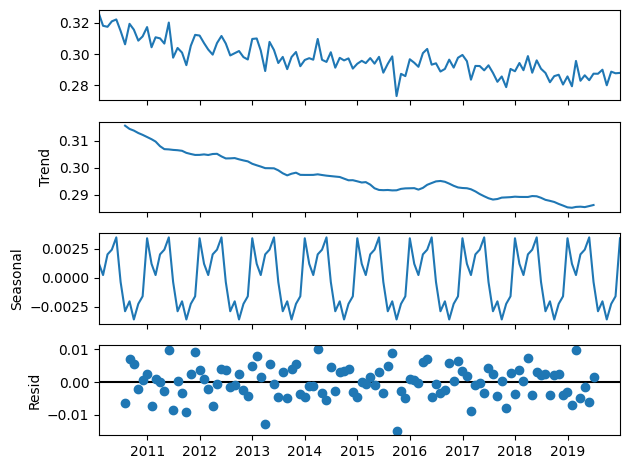

In [82]:
result.plot()
plt.show()

In [83]:
from statsmodels.tsa.stattools import adfuller

### Teste de Estacionaridade

In [86]:
def teste_adf(serie):
    result = adfuller(serie)
    print('ADF Estatíticas: %f' % result[0])
    print('Valor de P: %f' % result[1])
    print('Valores Críticos:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] < 0.05:
        print("A série é estacionária.")
    else:
        print("A série não é estacionária.")

In [88]:
# Executa o teste de estacionaridade em 'taxa_yll'
teste_adf(time_series['taxa_yll'])

ADF Estatíticas: -2.147252
Valor de P: 0.225943
Valores Críticos:
	1%: -3.493
	5%: -2.889
	10%: -2.581
A série não é estacionária.


### Tornando a série estacionária (Diferenciação)

In [89]:
# Diferenciação simples
time_series['taxa_yll_diff'] = time_series['taxa_yll'].diff().dropna()

# Verifica novamente a estacionaridade após a diferenciação
teste_adf(time_series['taxa_yll_diff'].dropna())

ADF Estatíticas: -6.652398
Valor de P: 0.000000
Valores Críticos:
	1%: -3.490
	5%: -2.888
	10%: -2.581
A série é estacionária.


<Axes: xlabel='dt_obito'>

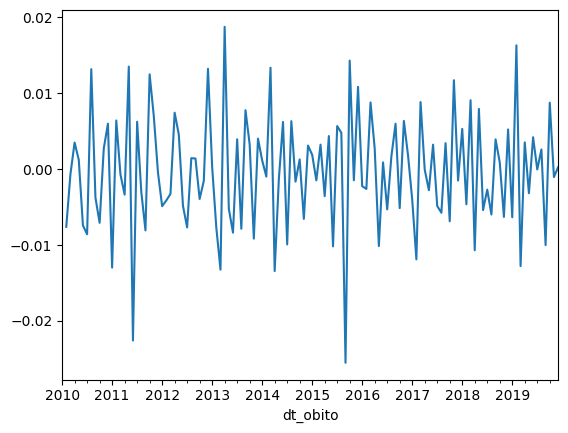

In [90]:
xlabel='Data'
time_series['taxa_yll_diff'].plot()

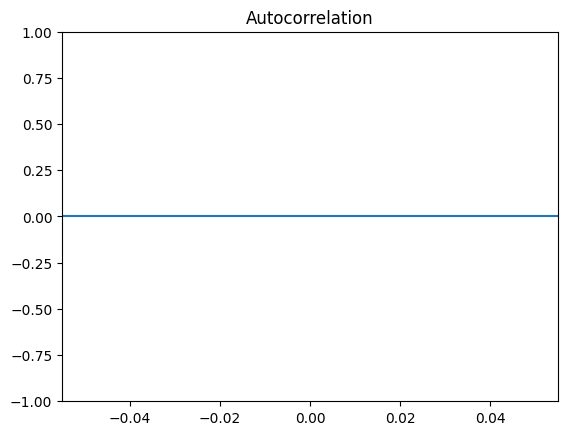

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series['taxa_yll_diff'])
plt.show()